# Lambdas, entropy and variance

+ $\gamma$ are the structural parameters, that generate the original priors $\lambda^0$
+ $z$ are characteristics of the product and firm
+ $(\mu^0, \sigma^0)$ is the initial mean and standard deviation of the initial belief, which is over the demand next period.

It's easy to write $\lambda^0 = \gamma'z$, but the gammas become more difficult to interpret and maybe more difficult to identify.

It's better if the $z$'s have a simple (say, monotonic or quadratic) relationship with the $(\mu^0, \sigma^0)$

According to [this cross validated question](), if we have a mixed distribution

$$f(x) = \sum_i{\lambda_i f_i(x)},$$

then 

$$E[f(x)] = \sum_i{\lambda_i E[f_i(x)]}$$

and

$$\text{Var}(f) = \sum_i{\lambda_i \sigma^2_i} + \sum_i{\lambda_i \left( \mu_i \right)^2} - \left(   \sum_{i}{\lambda_i \mu_i} \right)^2$$

## Just two lambdas and same variance

Simplifies to

$$\text{Var}(f) = \sigma^2 + \lambda_1 (\mu_1)^2 + \lambda_2 (\mu_2)^2 - \left( \lambda_1 \mu_1 + \lambda_2 \mu_2 \right)^2 $$

$$\text{Var}(f) = \sigma^2 + \lambda_1 (\mu_1)^2 + (1 - \lambda_1) (\mu_2)^2 - \left( \lambda_1 \mu_1 + (1-\lambda_1) \mu_2 \right)^2 $$


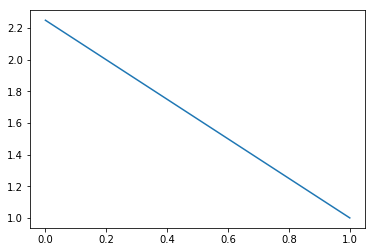

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def var_f_simple(λ1, μ1, μ2, sigma2):
    return sigma2 + λ1*(μ1)**2 + (1-λ1)*(μ2)**2 - (λ1*μ1 + (1-λ1)*μ1)**2

μ1, μ2 = 1., 1.5
sigma2 = 1.

fig, ax = plt.subplots(1, 1)

λ1 = np.linspace(0., 1., num=100)
ax.plot(λ1, var_f_simple(λ1, μ1, μ2, sigma2))

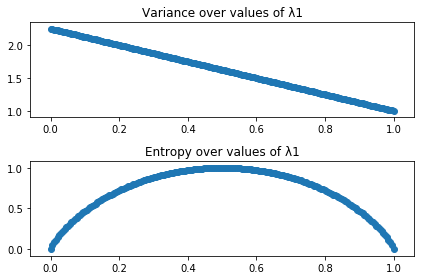

In [24]:
from scipy.stats import entropy

#Scatter between entropy and variance
λ1 = np.linspace(0., 1., num=200)
variances = var_f_simple(λ1, μ1, μ2, sigma2)
entropies = np.empty_like(variances)
for i in range(len(entropies)):
    entropies[i] = entropy([λ1[i], 1 - λ1[i]], base=2)
fig, [ax1, ax2] = plt.subplots(2, 1)
ax1.scatter(λ1, variances)
ax1.set_title("Variance over values of λ1")
ax2.scatter(λ1, entropies)
ax2.set_title("Entropy over values of λ1")
fig.tight_layout()

In [10]:
range(entropies)

TypeError: only integer scalar arrays can be converted to a scalar index

In [23]:
entropy(np.array([[0.5, 0.2, 0.3], [0.9, 0.1, 0.]]).T)

array([1.02965301, 0.32508297])

## Is setting entropy + expected value enough to define unique $\lambda$'s?

The problem is to choose a function $G$ such that $G(entropy, extra_normalization)$ spits a uniquer combination of lambdas

Let's start with the case of two lambdas and see where that goes

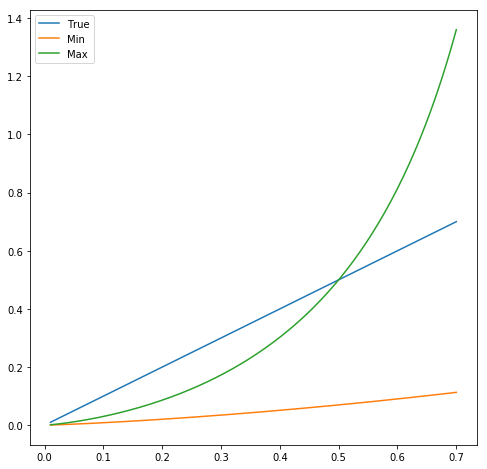

In [44]:
# Aproximation from here:
#https://math.stackexchange.com/questions/188195/inverse-of-binary-entropy-function-for-0-le-x-le-frac12

def inverse_h(x):
    min_ = x/ (2*np.log2(6/x))
    max_ = x / (np.log2(1/x))
    return np.array([min_, max_])

def G(entropy, mean):
    pass

entropies = np.linspace(0.01, 0.7, num=200)
inverses = inverse_h(entropies)
mins_, maxs_ = inverses[0, :], inverses[1, :]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(entropies, entropies, label="True")
ax.plot(entropies, mins_, label="Min")
ax.plot(entropies, maxs_, label="Max")
ax.legend()


In [41]:
inverse_h(entropies)[0, :]

array([0.00054178, 0.00086258, 0.00120448, 0.00156401, 0.00193894,
       0.00232773, 0.00272923, 0.00314252, 0.00356688, 0.00400171,
       0.00444652, 0.00490086, 0.00536437, 0.00583672, 0.00631762,
       0.00680683, 0.00730411, 0.00780925, 0.00832208, 0.00884241,
       0.00937009, 0.00990499, 0.01044696, 0.01099589, 0.01155166,
       0.01211417, 0.01268332, 0.01325902, 0.01384118, 0.01442973,
       0.01502458, 0.01562567, 0.01623294, 0.01684631, 0.01746573,
       0.01809114, 0.01872249, 0.01935972, 0.0200028 , 0.02065167,
       0.0213063 , 0.02196663, 0.02263264, 0.02330428, 0.02398151,
       0.02466431, 0.02535265, 0.02604648, 0.02674579, 0.02745054,
       0.02816071, 0.02887626, 0.02959719, 0.03032346, 0.03105504,
       0.03179193, 0.03253409, 0.03328151, 0.03403418, 0.03479206,
       0.03555515, 0.03632342, 0.03709687, 0.03787547, 0.03865922,
       0.0394481 , 0.04024209, 0.04104118, 0.04184536, 0.04265462,
       0.04346895, 0.04428834, 0.04511277, 0.04594224, 0.04677